# Volatilidad

## ¿Qué es la Volatilidad Histórica?

La volatilidad histórica mide **la variabilidad de los precios** de un activo financiero durante un período específico. Es fundamental en el análisis cuantitativo, ya que proporciona una perspectiva sobre el riesgo inherente de un instrumento.

### Características

1. **Medida del riesgo**  
   - Calculada como la desviación estándar de los retornos normalizados.  
   - Expresada como un porcentaje anualizado.  
   - Facilita la comparación del riesgo entre diferentes activos.  

2. **Cálculo técnico**  
   - Utiliza retornos logarítmicos para normalizar los cambios de precio.  
   - Puede aplicarse a diferentes períodos (e.g., 5 días, 30 días).  
   - La anualización se realiza comúnmente con 260 días hábiles.  

## Aplicaciones

### Evaluación de Opciones  

La volatilidad histórica se usa para:  
- Predecir el comportamiento de primas de opciones.  
- Detectar posibles desarbitrajes en el mercado.  
- Calcular precios teóricos de derivados.  

### Gestión de Riesgo  

Es útil para:  
- Estimar el riesgo a corto plazo de posiciones.  
- Evaluar el comportamiento potencial de portafolios.  
- Analizar el nivel de riesgo en acciones, bonos y otros instrumentos.  

## Técnicas Avanzadas  

### Oscilador de Volatilidad  

Permite analizar la evolución de la volatilidad:  
- Compara volatilidades de corto y largo plazo.  
- Ayuda a identificar tendencias.  
- Indica posibles convergencias entre volatilidades.  

### Ratios de Volatilidad  

Estos ratios son herramientas clave para interpretar la volatilidad:  
- Comparan períodos cortos y largos.  
- Identifican cambios en los regímenes de volatilidad.  
- Pueden ser usados para anticipar movimientos futuros.  

### Volatilidad de Yang-Zhang  

La volatilidad de Yang-Zhang combina elementos de la volatilidad histórica, intradía y gap (diferencias entre el cierre y la apertura). Se calcula mediante:  
1. **Retornos logarítmicos intradía**: Reflejan los movimientos de precios dentro del día.  
2. **Gap overnight**: Captura los saltos de precio entre el cierre y la apertura.  
3. **Volatilidad clásica**: Usa la desviación estándar de retornos diarios.  

Es más precisa al considerar las fluctuaciones completas de un activo. Es especialmente útil en activos con alta frecuencia de trading.  

## Ejemplo

Para una acción (e.g., GGAL):  
1. Calcular la volatilidad de 5 días y 30 días.  
2. Crear un oscilador de volatilidad con ambas métricas.  
3. Visualizar las tendencias para identificar posibles cambios.  

## Consejos

- Analiza múltiples períodos para obtener una visión integral.  
- Usa la volatilidad como complemento de otros indicadores.  
- Recuerda: Es una medida de riesgo, no una predicción absoluta.  


In [39]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

def configurar_estilo_graficos():
    """Configura el estilo de los gráficos usando seaborn y ggplot."""
    sns.set_theme(style="whitegrid")
    plt.style.use('ggplot')

def calcular_retornos_logaritmicos(precios):
    """Calcula los retornos logarítmicos de una serie de precios."""
    return np.log(precios / precios.shift(1))

def calcular_volatilidad_historica(retornos_log, periodos, factor_anualizado=252):
    """Calcula la volatilidad histórica."""
    volatilidad = retornos_log.rolling(window=periodos).std() * np.sqrt(factor_anualizado)
    return volatilidad

def calcular_oscilador_volatilidad(volatilidad_largo_plazo, volatilidad_corto_plazo):
    """Calcula el oscilador de volatilidad."""
    return volatilidad_largo_plazo - volatilidad_corto_plazo

La volatilidad de Yang Zhang está compuesta por tres componentes:

$$\sigma_{YZ}^2 = \sigma_{O}^2 + k\sigma_{C}^2 + (1-k)\sigma_{RS}^2$$

Donde:

$$k = \frac{0.34}{1.34 + \frac{n+1}{n-1}}$$

Y los componentes son:

1. Volatilidad Overnight (open-to-close):
$$\sigma_{O}^2 = \frac{252}{n-1}\sum_{i=1}^n(u_i - \bar{u})^2$$
donde $u_i = \ln(\frac{O_i}{C_{i-1}})$

2. Volatilidad Close-to-Close:
$$\sigma_{C}^2 = \frac{252}{n-1}\sum_{i=1}^n(c_i - \bar{c})^2$$
donde $c_i = \ln(\frac{C_i}{O_i})$

3. Volatilidad Rogers-Satchell:
$$\sigma_{RS}^2 = \frac{252}{n}\sum_{i=1}^n[ln(\frac{H_i}{O_i})(ln(\frac{H_i}{C_i})) + ln(\frac{L_i}{O_i})(ln(\frac{L_i}{C_i}))]$$

Donde:
- $O_i$ es el precio de apertura
- $H_i$ es el precio más alto
- $L_i$ es el precio más bajo
- $C_i$ es el precio de cierre
- $n$ es el número de observaciones
- 252 es el factor de anualización


k es un factor de ponderación que optimiza la eficiencia del estimador de Yang-Zhang, y se calcula como:
$$k = \frac{0.34}{1.34 + \frac{n+1}{n-1}}$$
Donde:

n es el número de observaciones en la ventana de tiempo
0.34 y 1.34 son constantes determinadas empíricamente por Yang y Zhang para minimizar la varianza del estimador

Por ejemplo:

Si n = 30 días, k ≈ 0.25
Si n = 60 días, k ≈ 0.27
Cuando n → ∞, k → 0.25

Este factor k determina cuánto peso se le da a la volatilidad open-to-close ($\sigma_C^2$) versus la volatilidad Rogers-Satchell ($\sigma_{RS}^2$) en la fórmula final. La idea es balancear estas dos medidas de volatilidad intraday de manera óptima.

In [40]:

def calcular_volatilidad_yang_zhang(datos, window=30):
    """
    Calcula la volatilidad de Yang-Zhang.
    
    Parámetros:
    datos (pd.DataFrame): DataFrame con precios OHLC
    window (int): Ventana de tiempo para el cálculo
    
    Retorna:
    pd.Series: Volatilidad de Yang-Zhang
    """
    # Constantes
    k = 0.34 / (1.34 + (window + 1) / (window - 1))
    
    # Retornos overnight
    overnight_returns = np.log(datos['Open'] / datos['Close'].shift(1))
    
    # Retornos open-close
    open_close_returns = np.log(datos['Close'] / datos['Open'])
    
    # Componente overnight
    sigma_overnight = overnight_returns.rolling(window=window).var()
    
    # Componente open-close
    sigma_open_close = open_close_returns.rolling(window=window).var()
    
    # Componente Rogers-Satchell
    log_ho = np.log(datos['High'] / datos['Open'])
    log_lo = np.log(datos['Low'] / datos['Open'])
    log_hc = np.log(datos['High'] / datos['Close'])
    log_lc = np.log(datos['Low'] / datos['Close'])
    
    rs = log_ho * (log_ho - log_hc) + log_lo * (log_lo - log_lc)
    sigma_rs = rs.rolling(window=window).mean()
    
    # Volatilidad Yang-Zhang
    sigma_yz = np.sqrt((sigma_overnight + k * sigma_open_close + (1 - k) * sigma_rs) * 252)
    
    return sigma_yz





### Volatilidad de Parkinson
Esta forma de medir la volatilidad fue desarrollada por el economista estadounidense Michael Parkinson en 1980. En su paper “The Extreme Value Method for Estimating the Variance of the Rate of Return”, Parkinson se basa en la idea de que la volatilidad se relaciona con la amplitud de los movimientos extremos de precio, independientemente de la dirección de esos movimientos. Por esta razón, este indicador utiliza los precios máximos y mínimos en lugar de los precios de cierre. Esto significa que es menos sensible a las fluctuaciones rápidas del mercado y que puede ser más preciso mostrando una volatilidad real, y no por un pico puntual en un precio.

Este indicador se suele utilizar mucho en las situaciones en las que se desee tener en cuenta la amplitud de los movimientos en los precios en una acción, sin tener en cuenta la dirección.

La fórmula para calcular la Volatilidad de Parkinson es la siguiente:

La fórmula de la volatilidad de Parkinson se expresa así:

$$\sigma_P = \sqrt{\frac{1}{4\ln(2)}\frac{252}{n}\sum_{i=1}^n[\ln(\frac{H_i}{L_i})]^2}$$

Donde:
- $\sigma_P$ es la volatilidad de Parkinson anualizada
- $H_i$ es el precio más alto del día i
- $L_i$ es el precio más bajo del día i
- $n$ es el número de días en la ventana de tiempo
- 252 es el factor de anualización (días de trading en un año)
- $\ln$ es el logaritmo natural

El factor $\frac{1}{4\ln(2)}$ es aproximadamente 0.361. Este factor es una constante de normalización que surge de la derivación matemática asumiendo que los precios siguen un movimiento browniano geométrico.

In [41]:
def calcular_volatilidad_parkinson(datos, window=30):
    """
    Calcula la volatilidad de Parkinson.
    
    Parámetros:
    datos (pd.DataFrame): DataFrame con precios High y Low
    window (int): Ventana de tiempo para el cálculo
    
    Retorna:
    pd.Series: Volatilidad de Parkinson
    """
    factor = 1.0 / (4.0 * np.log(2.0))
    log_hl = np.log(datos['High'] / datos['Low'])
    sigma_p = np.sqrt(factor * log_hl.pow(2).rolling(window=window).mean() * 252)
    return sigma_p

In [42]:
def graficar_analisis_volatilidad(df):
    """Crea un gráfico completo de análisis de volatilidad."""
    configurar_estilo_graficos()

    plt.figure(figsize=(15, 15))

    # Gráfico de Líneas de Volatilidad Clásica
    plt.subplot(5, 1, 1)
    plt.plot(df.index, df['volatilidad_corto_plazo'], label='Volatilidad Corto Plazo (5 días)', color='blue')
    plt.plot(df.index, df['volatilidad_largo_plazo'], label='Volatilidad Largo Plazo (30 días)', color='red')
    plt.title('Comparación de Volatilidad Clásica')
    plt.legend()

    # Gráfico de Volatilidad Yang-Zhang
    plt.subplot(5, 1, 2)
    plt.plot(df.index, df['volatilidad_yang_zhang'], label='Volatilidad Yang-Zhang', color='orange')
    plt.title('Volatilidad Yang-Zhang')
    plt.legend()

    # Gráfico de Volatilidad Parkinson
    plt.subplot(5, 1, 3)
    plt.plot(df.index, df['volatilidad_parkinson'], label='Volatilidad Parkinson', color='green')
    plt.title('Volatilidad Parkinson')
    plt.legend()

    # Gráfico de Oscilador de Volatilidad
    plt.subplot(5, 1, 4)
    plt.plot(df.index, df['oscilador_volatilidad'], label='Oscilador de Volatilidad', color='purple')
    plt.title('Oscilador de Volatilidad')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.legend()

    # Gráfico de Ratio de Volatilidad
    plt.subplot(5, 1, 5)
    plt.plot(df.index, df['ratio_volatilidad'], label='Ratio de Volatilidad', color='brown')
    plt.title('Ratio de Volatilidad')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [48]:
def main(ticker='GGAL', fecha_inicio=None, fecha_fin=None):
    """Función principal para realizar análisis de volatilidad histórica."""
    if fecha_inicio is None:
        fecha_fin = datetime.now()
        fecha_inicio = fecha_fin - timedelta(days=180)

    # Descargar datos de la acción
    datos_accion = yf.download(ticker, start=fecha_inicio, end=fecha_fin)

    if datos_accion.empty:
        print("No se encontraron datos para el ticker especificado.")
        return

    # Calcular retornos logarítmicos
    retornos_log = calcular_retornos_logaritmicos(datos_accion['Close'])

    # Calcular volatilidades
    volatilidad_corto_plazo = calcular_volatilidad_historica(retornos_log, periodos=5)
    volatilidad_largo_plazo = calcular_volatilidad_historica(retornos_log, periodos=30)
    volatilidad_yang_zhang = calcular_volatilidad_yang_zhang(datos_accion)
    volatilidad_parkinson = calcular_volatilidad_parkinson(datos_accion)

    # Calcular oscilador y ratio de volatilidad
    oscilador_volatilidad = calcular_oscilador_volatilidad(volatilidad_largo_plazo, volatilidad_corto_plazo)
    ratio_volatilidad = volatilidad_largo_plazo / volatilidad_corto_plazo

    # Combinar resultados
    df_resultados = pd.DataFrame({
        'volatilidad_corto_plazo': volatilidad_corto_plazo,
        'volatilidad_largo_plazo': volatilidad_largo_plazo,
        'volatilidad_yang_zhang': volatilidad_yang_zhang,
        'volatilidad_parkinson': volatilidad_parkinson,
        'oscilador_volatilidad': oscilador_volatilidad,
        'ratio_volatilidad': ratio_volatilidad
    }, index=datos_accion.index)

    # Graficar resultados
    graficar_analisis_volatilidad(df_resultados)

    return df_resultados

[*********************100%%**********************]  1 of 1 completed


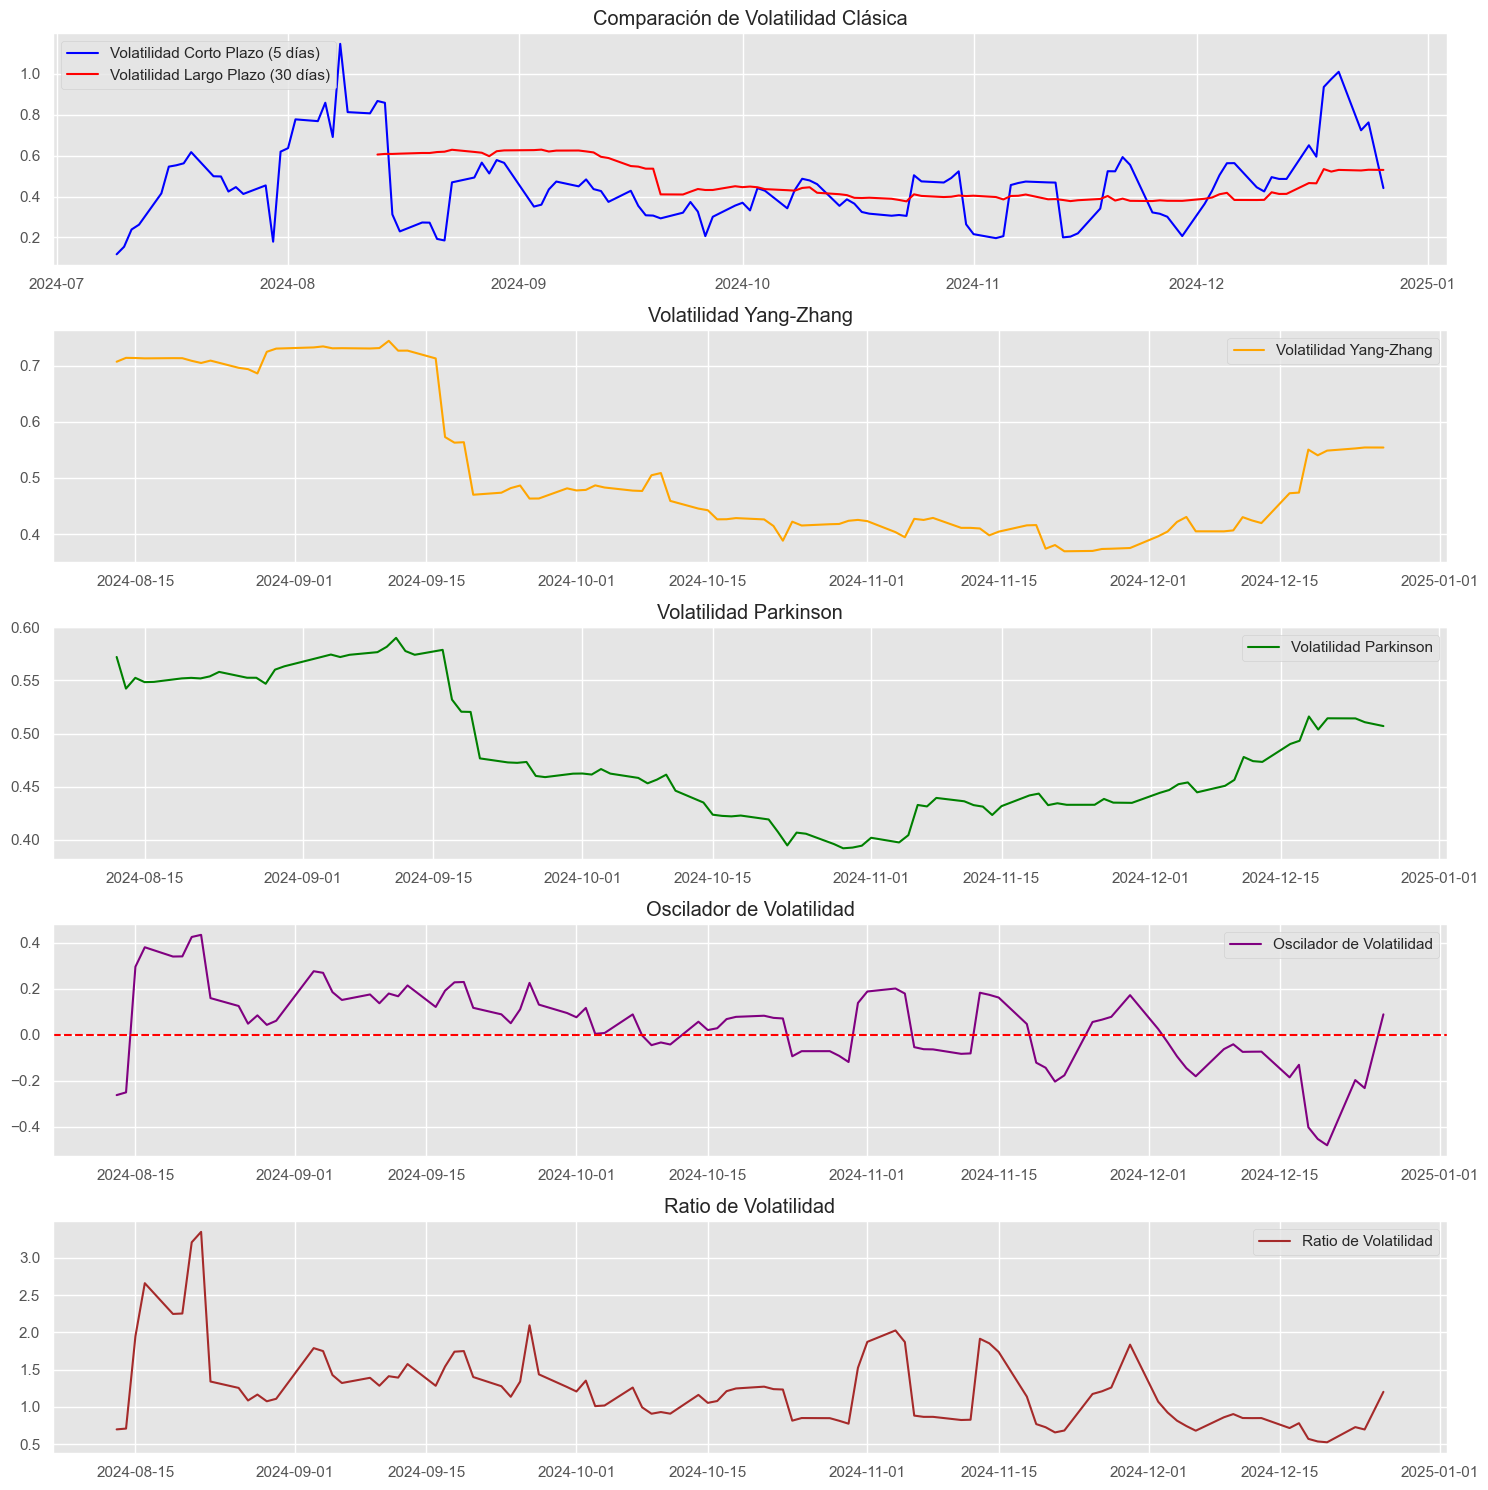

            volatilidad_corto_plazo  volatilidad_largo_plazo  \
Date                                                           
2024-07-01                      NaN                      NaN   
2024-07-02                      NaN                      NaN   
2024-07-03                      NaN                      NaN   
2024-07-05                      NaN                      NaN   
2024-07-08                      NaN                      NaN   
...                             ...                      ...   
2024-12-19                 0.974494                 0.522042   
2024-12-20                 1.010212                 0.530213   
2024-12-23                 0.724114                 0.527398   
2024-12-24                 0.762454                 0.530986   
2024-12-26                 0.441206                 0.530069   

            volatilidad_yang_zhang  volatilidad_parkinson  \
Date                                                        
2024-07-01                     NaN           

In [49]:
if __name__ == "__main__":
    resultados = main()
    if resultados is not None:
        print(resultados)